# Assignment 3

Due Date:  11:59pm on Friday, November 13th (for now)

There are some subtle issues to worry about in each of these questions, and thus I
will be discussing each problem in class on Monday, November 9th.

## Question 1 - Fourier Analysis

Consider the following triangular pulse signal:

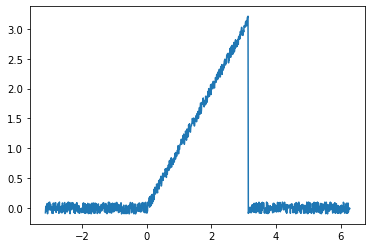

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import random

N_samples = 1000
t_low = -np.pi
t_high = 2.0*np.pi

t = np.linspace(t_low,t_high,N_samples)
y = np.zeros(N_samples)

for i in range(N_samples):
    if t[i] < 0.0:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    if t[i] >= 0.0 and t[i] < np.pi:
        y[i] = t[i] + 0.1*random.uniform(-1,1)
    if t[i] >= np.pi:
        y[i] = 0.0 + 0.1*random.uniform(-1,1)
    
plt.plot(t,y)

(a) Using the jupyter notebooks called graph_fourier_basic.ipynb and graph_fourier_guitar.ipynb to help you, calcuate the Fourier transform of this signal.

You should create plots of both the real and imaginary Fourier components as a function
of frequency, a plot of the Fourier power spectrum as a function of frequency, and also
a plot of the time spectrum using the Fourier components as compared to the original time spectrum.

(b) Discuss the resulting Fourier spectrum. Which Fourier components do you expect to be small (or zero), based on the theory?  What is the Nyquist frequency, and how many terms in the Fourier series is necessary to give a good approximation to the original signal?

In [ ]:
f_s = 0.2
period = 1/f_s
T = 2*period
N_terms = int(N_samples / 2)
dt = period/N_samples

f = np.zeros(N_terms)
for i in range(N_terms):
    f[i] = i/(N_terms*dt)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

twopiT=2.0*np.pi/T
epsilon = 0.000001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)

ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

In [ ]:
integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.2f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))

Average Power = 0.62 Watts.
Nyquist frequency = 100.00 Hz.


In [ ]:
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2

(-100.0, 100.0)

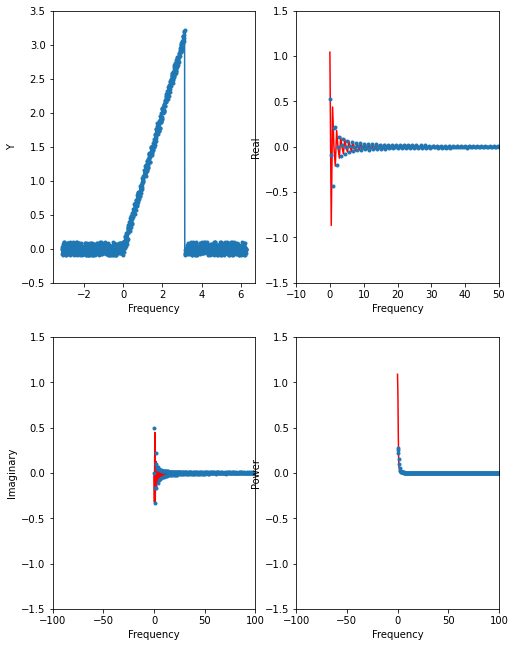

In [ ]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-.5, 3.5)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)
axs2[0,1].set_xlim(-10,50)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)
axs2[1,0].set_xlim(-100,100)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.5,1.5)
axs2[1,1].set_xlim(-100,100)

## Question 2 - Frogs and Lily Pads

Modify the Jupyter Notebook called frogger.ipynb to include the possibility that the frog can jump in either direction (not just forward). Use the following algorithm:

From wherever the frog is currently sitting (i.e. anywhere from the starting position to the last lily pad), it can jump to any other available position, including back to the starting position, or to the other side of the stream.  The frog should continue jumping until that moment when it gets to the other side of the stream.  The probability should be uniform/equal for jumping to any available position.

The goal here is to calculate the average number of jumps, as function of the number of lily pads.

Does the final result surprise you?  

As a final check that your simulation is reasonable, plot the DISTRIBUTION of the number of jumps taken for N$_{lily~pads}$ = 30.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import seaborn as sns

In [ ]:
n = 30
random.seed(1)
start = 0
jumpsum = 0
total_jumps = 0
n_trys = 10000

x = []
y = []
sigma = []

In [ ]:
for npad in range(1,n+1): 
    x.append(npad)
    end = npad
    for j in range(n_trys):
        while start < npad:
            jump = int(random.uniform(1,(end-start+1)))
            start = start + jump
            jumpsum = jumpsum + 1
        start = 0
        total_jumps = total_jumps + jumpsum
        jumpsum = 0

    expectation_value = total_jumps/n_trys*1.0
    y.append(expectation_value)
    sigma.append(expectation_value*1/np.sqrt(n_trys))
    total_jumps = 0

<ErrorbarContainer object of 3 artists>

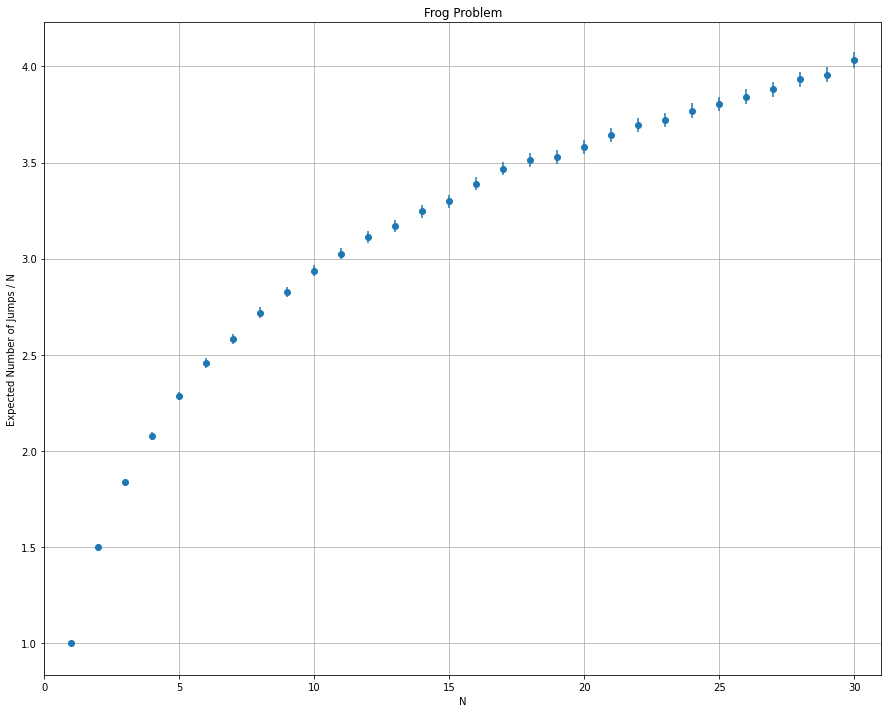

In [ ]:
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(111)

ax1.set_title("Frog Problem")
ax1.set_xlabel('N')
ax1.set_ylabel('Expected Number of Jumps / N')
ax1.set_xlim(0,n+1)
ax1.grid(True)

ax1.errorbar(x,y,yerr=sigma,fmt='o')

In [ ]:
n = 30
random.seed(1)
start = 0
jumpsum = 0
n_trys = 10000

jumps = []

In [ ]:
for j in range(n_trys):
    while start < n:
        jump = int(random.uniform(-start,(n-start+1)))
        if jump == 0:
          continue
        #print ("Jump = ",jump)
        start = start + jump
        #print ("Now at ",start)
        jumpsum = jumpsum + 1
    jumps.append(jumpsum)
    # print(jumpsum)
    start = 0
    jumpsum = 0


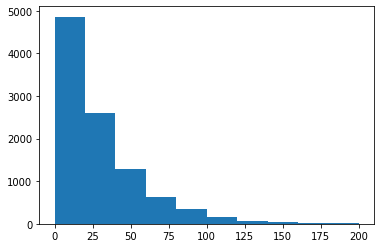

In [ ]:
plt.hist(jumps, range=(0, 200))
plt.show()

## Question 3 - Random Walk

Begin with the example Jupyter Notebook called drunken_sailor.ipynb  

In the first example, we considered random walk in one dimension.  For each step that a sailor took, we sampled from a random Gaussian distribution with a mean value of 0 and a standard deviation of 1.  

In this question, we would like to consider a different underlying distribution for the step size.  Instead of using a Gaussian, choose the step size from a Poisson distribution with an average value of 1.  Remember that the Poisson distribution is defined for positive values of $x$ only, and so you will also have to randomly choose the direction of the step.

How do the results compare to choosing a Gaussian distribution of step size?  Do your results agree with the predictions of the central limit theorem?

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats # has lots of distribution functions in it
import random

from math import erfc   # complimentary error function 

def walkn(nsteps):
    r = stats.poisson.rvs(1, size=nsteps)
    for i in range(len(r)):
      r[i] *= (1 if random.random() < 0.5 else -1)
    return sum(r)

def npart_walkn(npart,nsteps):
    xvec = np.zeros(0)
    for i in range(npart):
        x = walkn(nsteps)  
        xvec = np.append(xvec,x)  
    return xvec  

nsteps = 100 
npart = 1000 

xvec = npart_walkn(npart,nsteps)

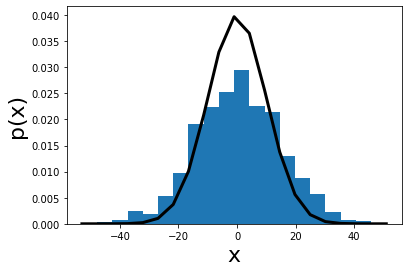

In [ ]:
n, bins, patches = plt.hist(xvec,bins=20,density=True)
#
# density = True will make it a normalized probability histogram
#
# this retuns as n the number of values counted, bins is the x values of the bins, 
# patches is for plotting the histogram
#
# bins will be the most important thing here - we will use that below
#
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)  # probability!

# a gaussian probability density distribution, this is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins)  # evaluate the function at the bin locations
plt.plot(bins,y,"k", lw=3 )  #plot the expected density distribution as a black line

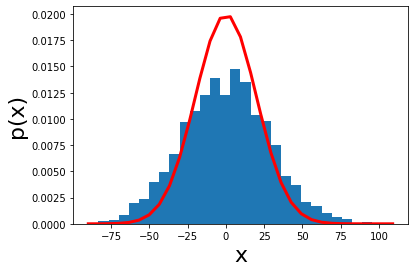

In [ ]:
# check that if we increase the number of particles we get the same answer
nsteps = 400 # number of steps
npart = 4000   # number of particles to let walk around
xvec = npart_walkn(npart,nsteps)

# plot the histogram, i.e., measured distribution of final positions after n steps of random walking around
n, bins, patches =plt.hist(xvec,bins=30,density=True)
plt.xlabel("x",fontsize=22)
plt.ylabel("p(x)",fontsize=22)

# a gaussian probability density distribution - is a function!
mygaus = stats.norm(0.0, np.sqrt(nsteps))  # should scale with sqrt(nsteps)
y = mygaus.pdf(bins) # evaluate the probability distribution at the bin values
plt.plot(bins,y,"r", lw=3 )  #plot the expected density distribution as a red line

The results somewhat agree with the Central Limit Theorem, but not as closely as when using a normal distribution of the steps. This could have something to do with the method of determining whether the step is positive or negative, but since all runs followed a similar pattern, this difference could be considered negligable.